In [54]:
import emcee
import matplotlib.pyplot as plt
import pyccl as ccl
import numpy as np
import corner
from IPython.display import display, Math
import seaborn as sns
import matplotlib.colors as mcolors
import scipy
import matplotlib
print(emcee.__version__)

3.1.6


In [2]:
# Define cosmology

cosmo_universe = ccl.Cosmology(Omega_c = 0.269619, 
                          Omega_b = 0.050041,
                          h = 0.6688,
                          n_s = 0.9626,
                          A_s = 2.092e-9)

Bias_distribution_fiducial = np.array([1.562362,
                             1.732963,
                             1.913252,
                             2.100644,
                             2.293210])


In [3]:
labels = [r"$\Omega_c$", r"$\mu_0$",r"$\Sigma_0$", r"$10^{9}A_s$", r"$h$", r"$n_s$", r"$\omega_b$",\
         r'$b_1$', r'$b_2$', r'$b_3$', r'$b_4$', r'$b_5$']

value1 = [cosmo_universe["Omega_c"], 0.0,0.0, cosmo_universe["A_s"]*1e9, cosmo_universe["h"],\
          cosmo_universe["n_s"],cosmo_universe["Omega_b"]*cosmo_universe["h"]**2,\
         Bias_distribution_fiducial[0], Bias_distribution_fiducial[1],\
         Bias_distribution_fiducial[2],Bias_distribution_fiducial[3],\
         Bias_distribution_fiducial[4]]

lower_value1 = [0.28 - 0.06, -1.5, -1.5, 1.7, 0.61 , 0.92, 0.04, 0.8,0.8,0.8,0.8,0.8]
upper_value1 = [0.36 - 0.04, 1.5, 1.5, 2.5, 0.73,1 , 0.06, 3.0,3.0,3.0,3.0,3.0]



In [9]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.serif": ["CMU Serif", "DejaVu Serif"]
})
col = sns.color_palette("colorblind") 

## f(R)

In [142]:
filename = "/scratch/c2042999/chains/mcmc_fR_muSigma_PCACuts.h5"

while True:
    try:
        reader = emcee.backends.HDFBackend(filename, read_only=True)
        break  # Exit the loop once file is read successfully
    except BlockingIOError:
        # Wait for some time before retrying
        print("File is locked, retrying...")
        time.sleep(0.1)  # Sleep for 1 second before trying again

# Check how many steps have been completed so far
n_steps_completed = reader.iteration
print(f"Number of steps completed: {n_steps_completed}")

# You can also manually access the raw chain and other properties
raw_chain = reader.get_chain(discard=2000, thin=20)#
print(f"Current raw chain shape: {raw_chain.shape}")

tau = reader.get_autocorr_time(tol=0)
max_tau_ratio = np.max(tau * 100 / reader.iteration)
converged = max_tau_ratio < 1
print("Current iteration: {}".format(reader.iteration))
print("Max 100 x Tau/N: {}".format(max_tau_ratio))


Number of steps completed: 15278
Current raw chain shape: (663, 76, 12)
Current iteration: 15278
Max 100 x Tau/N: 0.9988710159327192


In [137]:
# Get the raw chain and log-probabilities
raw_chain = reader.get_chain(flat=False)  # Unflattened chain: (steps, walkers, parameters)
log_prob = reader.get_log_prob(flat=False)  # Unflattened log-probabilities: (steps, walkers)

# Calculate burn-in index
n_burnin = 0 

# Remove the burn-in
raw_chain_burnin_removed = raw_chain[n_burnin:]  # Keep steps after burn-in
log_prob_burnin_removed = log_prob[n_burnin:]  # Keep log-probabilities after burn-in

# Flatten the chains after removing burn-in
raw_chain_flat = raw_chain_burnin_removed.reshape(-1, raw_chain.shape[-1])  # (samples, parameters)
log_prob_flat = log_prob_burnin_removed.reshape(-1)  # (samples,)

# Compute the mean of each parameter
mean_params = np.mean(raw_chain_flat, axis=0)

# Find the sample with the maximum log-probability
max_likelihood_index = np.argmax(log_prob_flat)
max_likelihood_params = raw_chain_flat[max_likelihood_index]

# Print the results
print("Mean parameter values (after burn-in):")
print(mean_params)

print("Maximum likelihood parameter values (after burn-in):")
print(max_likelihood_params)
print("Maximum likelihood: ", log_prob_flat[max_likelihood_index])


Mean parameter values (after burn-in):
[ 0.27021505  0.09909243 -0.03483287  2.03764703  0.67988732  0.96307643
  0.02239349  1.52820868  1.70106553  1.88341081  2.07166214  2.2642825 ]
Maximum likelihood parameter values (after burn-in):
[ 0.27184984  0.09909956 -0.03880647  2.06173591  0.6729207   0.96248513
  0.02238659  1.52925777  1.70343107  1.88797384  2.07678711  2.27163651]
Maximum likelihood:  9.808852968261089


In [143]:
# Assuming `raw_chain` is the MCMC chain you have loaded from the file.
filename = "/scratch/c2042999/chains/mcmc_fR_muSigma_StandardCuts.h5"

while True:
    try:
        reader = emcee.backends.HDFBackend(filename, read_only=True)
        break  # Exit the loop once file is read successfully
    except BlockingIOError:
        # Wait for some time before retrying
        print("File is locked, retrying...")
        time.sleep(0.1)  # Sleep for 1 second before trying again

raw_chain_standardcuts = reader.get_chain(discard=2000, thin=20)#

# Check how many steps have been completed so far
n_steps_completed = reader.iteration
print(f"Number of steps completed: {n_steps_completed}")

# You can also manually access the raw chain and other properties
print(f"Current raw chain shape: {raw_chain_standardcuts.shape}")


tau = reader.get_autocorr_time(tol=0)
max_tau_ratio = np.max(tau * 100 / reader.iteration)
converged = max_tau_ratio < 1
print("Current iteration: {}".format(reader.iteration))
print("Max 100 x Tau/N: {}".format(max_tau_ratio))


Number of steps completed: 27132
Current raw chain shape: (1256, 76, 12)
Current iteration: 27132
Max 100 x Tau/N: 0.995147415927885


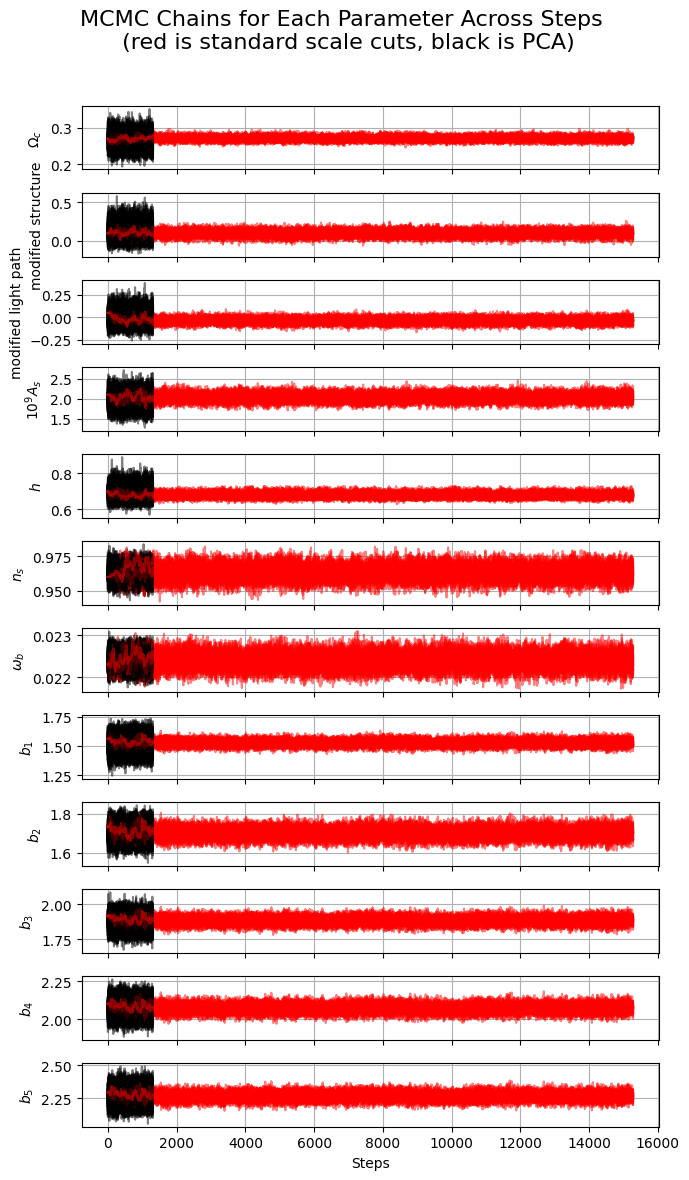

In [139]:
# Assuming `raw_chain` is the MCMC chain you have loaded from the file.
n_steps, n_walkers, n_params = raw_chain.shape

# Create a figure with subplots, one for each parameter
fig, axes = plt.subplots(n_params, figsize=(7, n_params), sharex=True)

# Iterate over each parameter and plot its evolution
for i in range(n_params):
    ax = axes[i]
    for j in range(40):
        ax.plot(raw_chain_standardcuts[:, j, i], alpha=0.5, color="k")  # Plot for each walker
        ax.plot(raw_chain[:, j, i], alpha=0.5, color="r")  # Plot for each walker
    #ax.plot(np.arange(len(raw_chain[:1000, 0, 0])), value1[i]*np.ones(len(raw_chain[:1000, 0, 0])), color="g")

    """
    ax.plot(np.arange(len(raw_chain_standardcuts[:, 0, 0])), value1[i]*np.ones(len(raw_chain_standardcuts[:, 0, 0])), color="g")
    ax.plot(np.arange(len(raw_chain_standardcuts[:, 0, 0])), lower_value1[i]*np.ones(len(raw_chain_standardcuts[:, 0, 0])), color="g", linestyle="--")
    ax.plot(np.arange(len(raw_chain_standardcuts[:, 0, 0])), upper_value1[i]*np.ones(len(raw_chain_standardcuts[:, 0, 0])), color="g", linestyle="--")
    """
    ax.set_ylabel(labels[i])
    ax.grid()

# Add a label for the shared x-axis (steps/iterations)
axes[-1].set_xlabel("Steps")

# Set the overall title and adjust layout
plt.suptitle("MCMC Chains for Each Parameter Across Steps \n (red is standard scale cuts, black is PCA)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
#plt.savefig("chains_ESS-C_noparametrization.pdf", bbox_inches='tight')
plt.show()

In [107]:
value1 = [cosmo_universe["Omega_c"], None,0.0, cosmo_universe["A_s"]*1e9, cosmo_universe["h"],\
          cosmo_universe["n_s"],cosmo_universe["Omega_b"]*cosmo_universe["h"]**2,\
         Bias_distribution_fiducial[0], Bias_distribution_fiducial[1],\
         Bias_distribution_fiducial[2],Bias_distribution_fiducial[3],\
         Bias_distribution_fiducial[4]]

(100016, 5)
(1161128, 5)


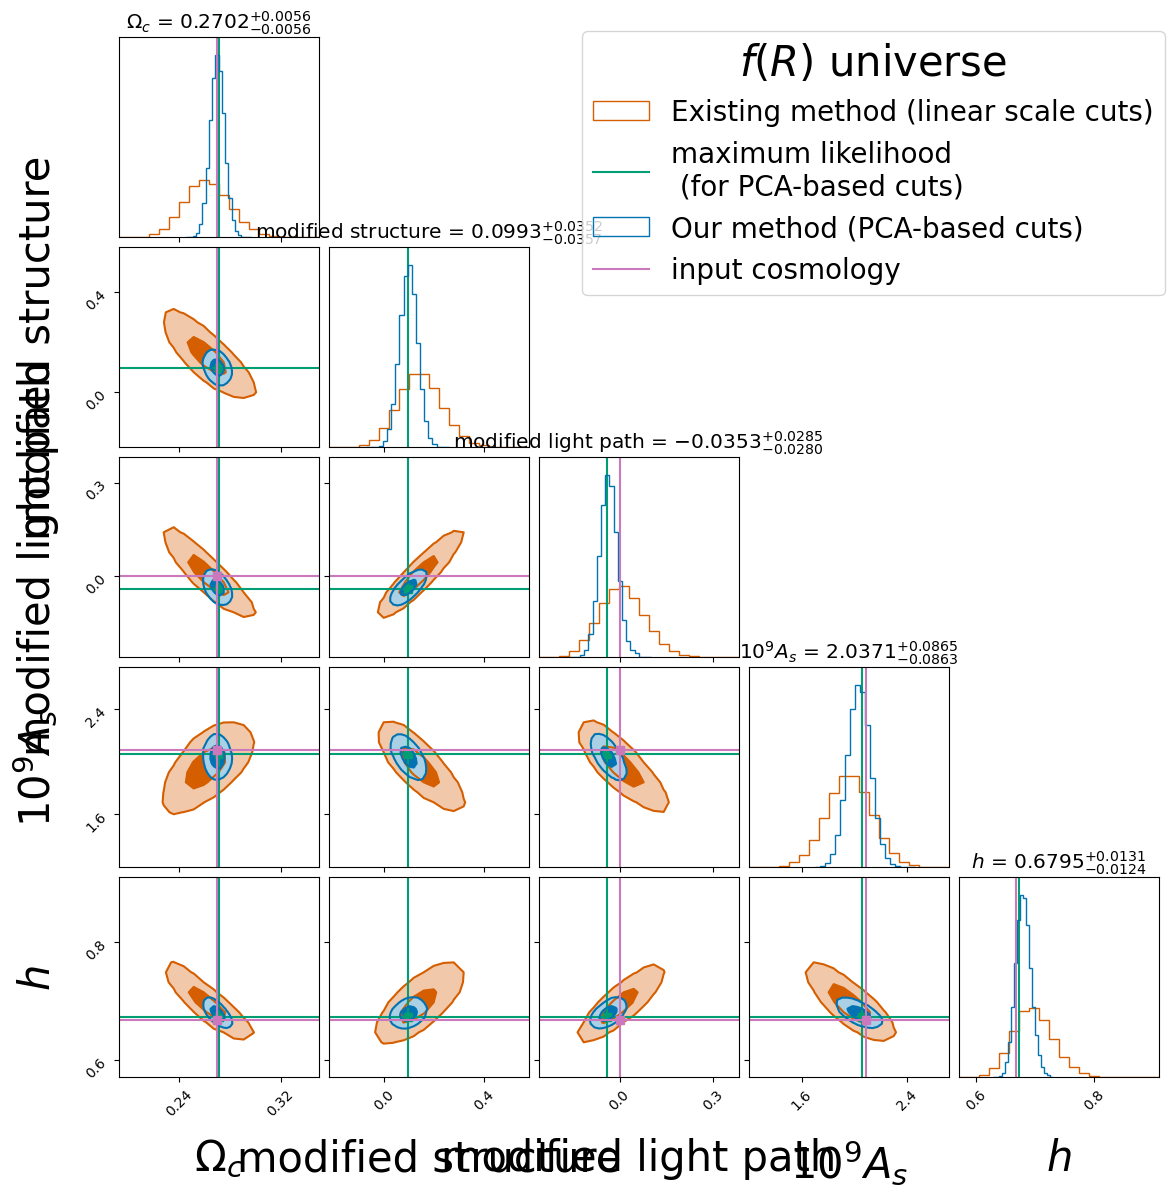

In [140]:
#### STANDARD CUTS #####

ndim = 5#len(labels)
burned_chain = raw_chain_standardcuts


CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f",
    truths=max_likelihood_params[:ndim],
    truth_color=mcolors.to_hex(col[2])
)

flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

print(flat_samples.shape)
len_chain_standardcuts = flat_samples.shape[0]

figure = corner.corner(
    flat_samples, **CORNER_KWARGS, labels=labels, color = mcolors.to_hex(col[3]),hist_kwargs=dict(density=True)
);

### PCA CUTS####

burned_chain = raw_chain
flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f",
    truths=value1[:ndim],
    truth_color=mcolors.to_hex(col[4])
)

print(flat_samples.shape)

corner.corner(
    flat_samples, fig=figure, **CORNER_KWARGS, labels=labels, color=mcolors.to_hex(col[0]),hist_kwargs=dict(density=True)
);

######################
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

#plt.legend(["Existing method (linear scale cuts)","maximum likelihood \n (for PCA-based cuts)","Our method (PCA-based cuts)","input cosmology"],\
#           bbox_to_anchor=(1.0, 12.7), fontsize=40,title=r"ESS universe",title_fontsize=60)
plt.legend(["Existing method (linear scale cuts)","maximum likelihood \n (for PCA-based cuts)","Our method (PCA-based cuts)","input cosmology"], bbox_to_anchor=(1.1, 5.3), fontsize=20,title=r"$f(R)$ universe",title_fontsize=30)

#plt.savefig("/home/c2042999/PCA_project/Figures/Final_figures/3x2pt_fsigma8_fR_marg.pdf", bbox_inches='tight')


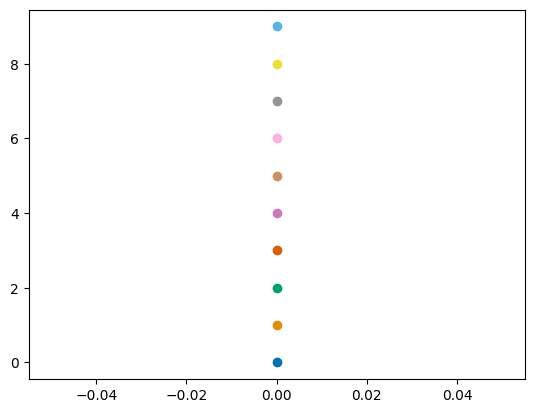

In [109]:

for i in range(10):
    plt.scatter(0,i,color=mcolors.to_hex(col[i]))

## Plot for Danielle

(101536, 12)
(1161128, 12)


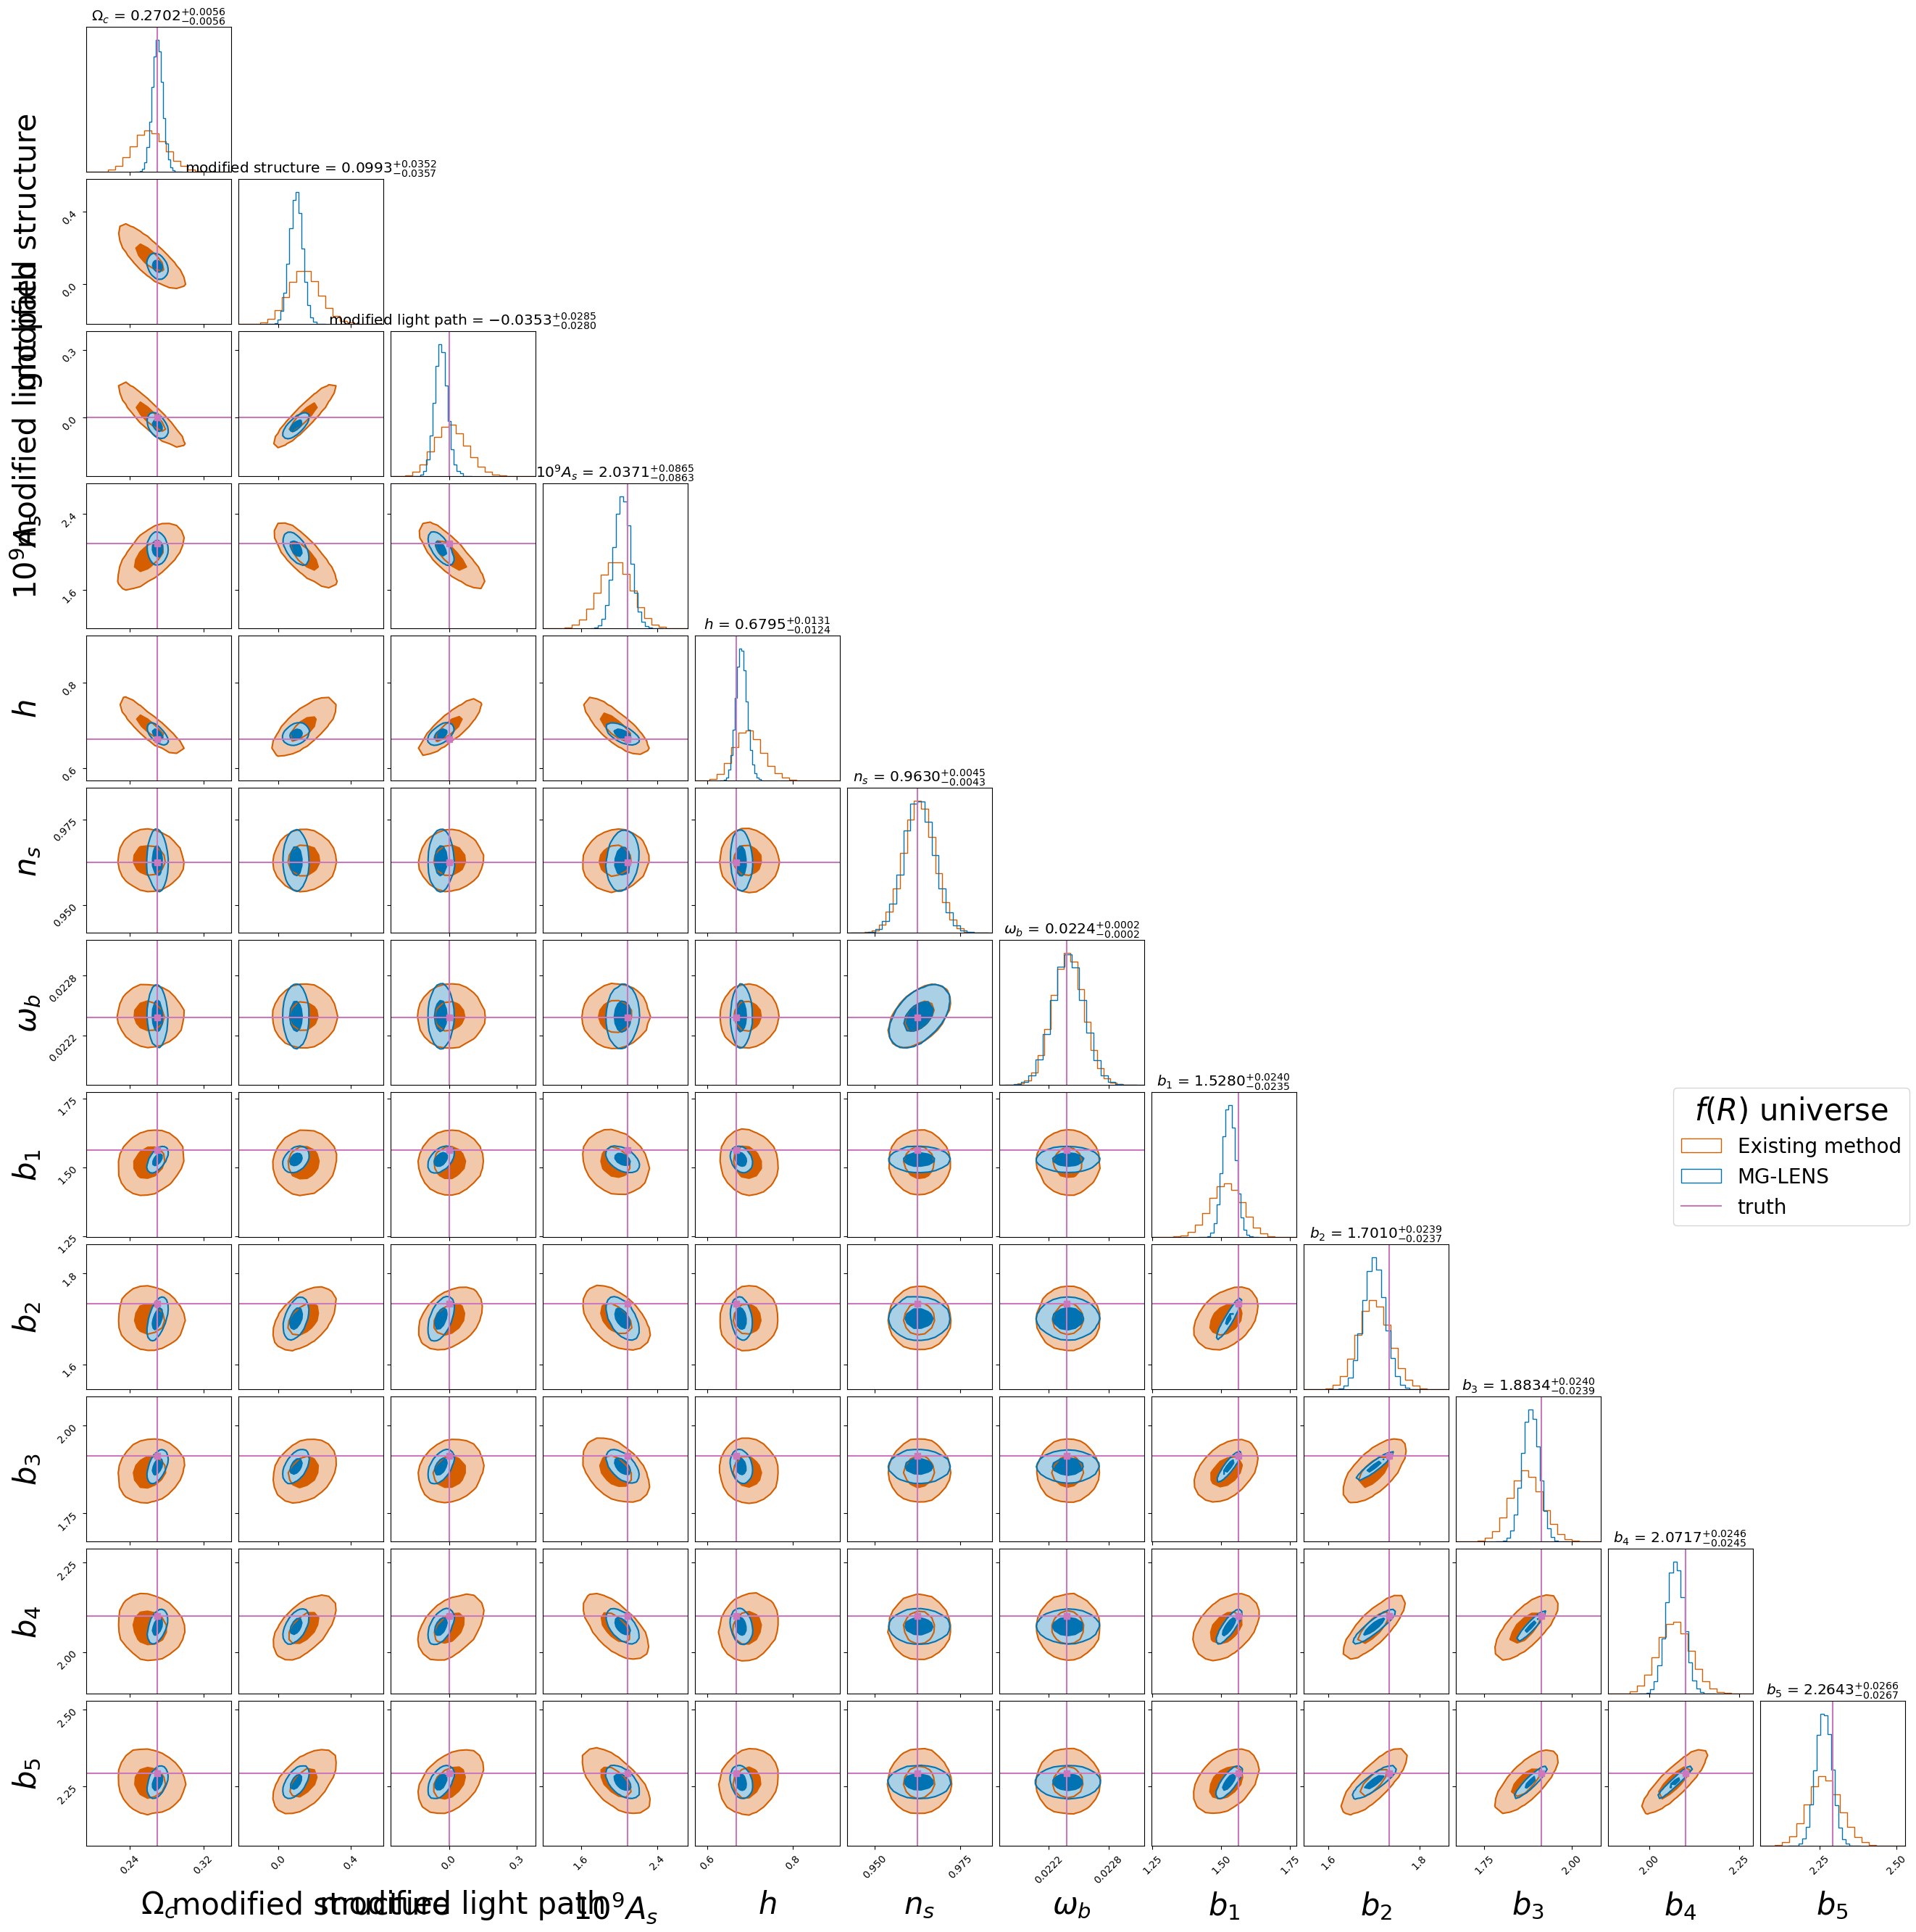

In [13]:
#### STANDARD CUTS #####

labels = [r"$\Omega_c$", r"modified structure",r"modified light path", r"$10^{9}A_s$", r"$h$", r"$n_s$", r"$\omega_b$",\
         r'$b_1$', r'$b_2$', r'$b_3$', r'$b_4$', r'$b_5$']

value1 = [cosmo_universe["Omega_c"], None,0.0, cosmo_universe["A_s"]*1e9, cosmo_universe["h"],\
          cosmo_universe["n_s"],cosmo_universe["Omega_b"]*cosmo_universe["h"]**2,\
         Bias_distribution_fiducial[0], Bias_distribution_fiducial[1],\
         Bias_distribution_fiducial[2],Bias_distribution_fiducial[3],\
         Bias_distribution_fiducial[4]]

ndim = len(labels)
burned_chain = raw_chain_standardcuts


CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f"
)

flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

print(flat_samples.shape)
len_chain_standardcuts = flat_samples.shape[0]

figure = corner.corner(
    flat_samples, **CORNER_KWARGS, labels=labels, color = mcolors.to_hex(col[3]),hist_kwargs=dict(density=True)
);

### PCA CUTS####

burned_chain = raw_chain
flat_samples =  burned_chain.reshape(-1, n_params)[:,:ndim]

CORNER_KWARGS = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),
    plot_datapoints=False,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f",
    truths=value1[:ndim],
    truth_color=mcolors.to_hex(col[4])
)

print(flat_samples.shape)

corner.corner(
    flat_samples, fig=figure, **CORNER_KWARGS, labels=labels, color=mcolors.to_hex(col[0]),hist_kwargs=dict(density=True)
);

######################
# Extract the axes
axes = np.array(figure.axes).reshape((ndim, ndim))

#plt.legend(["Existing method (linear scale cuts)","maximum likelihood \n (for PCA-based cuts)","Our method (PCA-based cuts)","input cosmology"],\
#           bbox_to_anchor=(1.0, 12.7), fontsize=40,title=r"ESS universe",title_fontsize=60)
plt.legend(["Existing method","MG-FOCUS","truth"], bbox_to_anchor=(1.1, 5.3), fontsize=20,title=r"$f(R)$ universe",title_fontsize=30)

#plt.savefig("/home/c2042999/PCA_project/Figures/Final_figures/3x2pt_fsigma8_fR_marg.pdf", bbox_inches='tight')


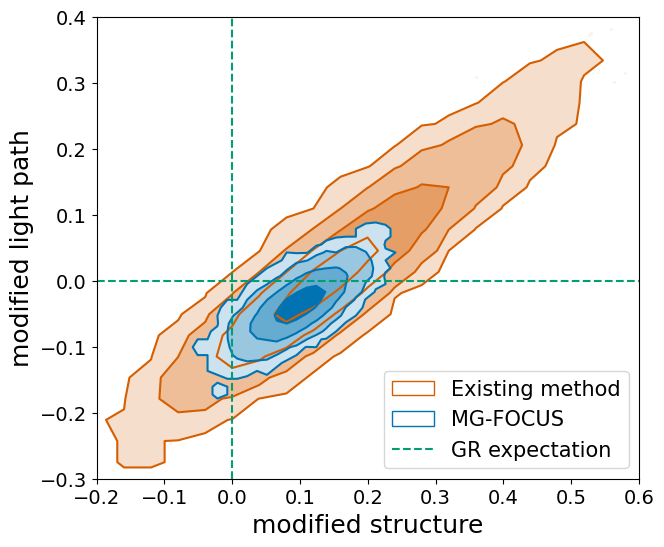

In [167]:
# Define your labels and indices
labels = [
    r"$\Omega_c$", r"modified structure", r"modified light path", r"$10^{9}A_s$", r"$h$", r"$n_s$", r"$\omega_b$",
    r'$b_1$', r'$b_2$', r'$b_3$', r'$b_4$', r'$b_5$'
]

plt.figure(figsize=(7, 6))

# Indices of the "modified structure" and "modified light path" dimensions
x_idx = 1  # "modified structure"
y_idx = 2  # "modified light path"

##### STANDARD CUTS ######
# Flatten the samples for the standard cuts
flat_samples = raw_chain_standardcuts.reshape(-1, n_params)[:, :len(labels)]

# Extract the relevant 2D samples
x_samples = flat_samples[:, x_idx]
y_samples = flat_samples[:, y_idx]

# Set up the corner plot arguments
CORNER_KWARGS_hist = dict(
    smooth=False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9/2), 1 - np.exp(-8)),
    #plot_datapoints=True,
    #no_fill_contours=True,
    fill_contours=True,
    max_n_ticks=3,
    label_kwargs=dict(fontsize=20),
    title_kwargs=dict(fontsize=14),
    color=mcolors.to_hex(col[3]),
    hist_kwargs=dict(density=True)
)

# Create the 2D contour plot
figure = corner.hist2d(
    x_samples, y_samples,
    labels=[labels[x_idx], labels[y_idx]],
    **CORNER_KWARGS_hist
)

### PCA CUTS####

flat_samples =  raw_chain.reshape(-1, n_params)[:,:ndim]

# Extract the relevant 2D samples
x_samples = flat_samples[:, x_idx]
y_samples = flat_samples[:, y_idx]


CORNER_KWARGS_hist = dict(
    label_kwargs=dict(fontsize=30),
    title_kwargs=dict(fontsize=14.5),
    show_titles=True,
    smooth = False,
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9/2), 1 - np.exp(-8)),
    #plot_datapoints=True,
    #no_fill_contours=True,
    fill_contours=True,
    max_n_ticks=2,
    title_fmt=".4f",
    color=mcolors.to_hex(col[0]),
    truths=value1[:ndim],
    truth_color=mcolors.to_hex(col[4])
)

figure = corner.hist2d(
    x_samples, y_samples,**CORNER_KWARGS_hist

)

plt.vlines(value1[y_idx], -0.3,0.4, color=mcolors.to_hex(col[2]), linestyle="--")
plt.hlines(value1[y_idx],-0.2,0.6, color=mcolors.to_hex(col[2]), linestyle="--")#color=mcolors.to_hex(col[4]))

plt.xlabel(labels[x_idx], fontsize=18)
plt.ylabel(labels[y_idx], fontsize=18)
plt.ylim(-0.2,0.2)
plt.xlim(-0.05,0.37)
#plt.xlim(-0.15,0.5)
#plt.ylim(-0.25,0.3)
plt.xlim(-0.2,0.6)
plt.ylim(-0.3,0.4)

# Create custom legend handles
legend_handles = [
    matplotlib.patches.Patch(facecolor="none", edgecolor=mcolors.to_hex(col[3]), label="Existing method"),
    matplotlib.patches.Patch(facecolor="none", edgecolor=mcolors.to_hex(col[0]), label="MG-FOCUS"),
    matplotlib.lines.Line2D([], [], color=mcolors.to_hex(col[2]), label="GR expectation", linestyle="--")
    #matplotlib.lines.Line2D([], [], color=mcolors.to_hex(col[4]), label="truth")
]

# Add legend to the plot
plt.legend(
    handles=legend_handles, 
    loc="lower right", 
    fontsize=15
)

plt.tick_params(axis='both', labelsize=14) 
#plt.title(r"$f(R)$ universe", fontsize=25)

#plt.savefig("/home/c2042999/PCA_project/Figures/3x2pt_fsigma8_fR_Danielle.pdf", bbox_inches='tight')

plt.show()
